# MATH 441 Discrete Optimization Problems

* LP Problems in Standard Form
* Feasible Solutions
* Finding Vertices

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## LP Problems in Standard Form

The **standard form** of a linear optimization problem is:

$$
\begin{array}{rc}
\text{maximize:} & \mathbf{c}^T \mathbf{x} \\
\text{subject to:} & A \mathbf{x} \leq \mathbf{b} \\
& \mathbf{x} \geq 0
\end{array}
$$

where:

* $\mathbf{c} \in \mathbb{R}^n$
* $\mathbf{x} \in \mathbb{R}^n$
* $A$ is a $m \times n$ matrix
* $\mathbf{b} \in \mathbb{R}^m$

Note: vector inequality $\mathbf{u} \leq \mathbf{v}$ means $u_i \leq v_i$ for each $i=0,\dots,n-1$.

The matrix equations above can be written explicitly as:

$$
\begin{array}{rc}
\text{maximize:} & c_0x_0 + \cdots + c_{n-1}x_{n-1} \\
\text{subject to:} & a_{0,0}x_0 + \cdots + a_{0,n-1}x_{n-1} \leq b_0 \\
& a_{1,0}x_0 + \cdots + a_{1,n-1}x_{n-1} \leq b_1 \\
& \vdots \\
& a_{m-1,0}x_0 + \cdots + a_{m-1,n-1}x_{n-1} \leq b_{m-1} \\
& x_0 \geq 0, \dots , x_{n-1} \geq 0
\end{array}
$$

Note: use 0-indexing as in Python, $\mathbf{x} = (x_0,x_1,\dots,x_{n-1})$.

## Feasible Solutions

Let's recall the basic definitions of LP:

* A vector $\mathbf{x} \in \mathbb{R}^n$ is a **feasible solution** if it satisfies the constraints: $A \mathbf{x} \leq \mathbf{b}$ and $\mathbf{x} \geq 0$.
* A feasible solution $\mathbf{x} \in \mathbb{R}^n$ is **optimal** if $\mathbf{c}^T \mathbf{y} \leq \mathbf{c}^T \mathbf{x}$ for all other feasible solutions $\mathbf{y} \in \mathbb{R}^n$.
* A linear optimization problem is **infeasible** if there are no feasible solutions.
* A linear optimization problem is **unbounded** if the set of feasible solutions is unbounded.
* A set $S \subset \mathbb{R}^n$ is **convex** if for all $\mathbf{x},\mathbf{y} \in S$ the line connecting $\mathbf{x}$ and $\mathbf{y}$ is also contained in $S$.
* The set of feasible solutions $S = \{ \mathbf{x} \in \mathbb{R}^n : A \mathbf{x} \leq \mathbf{b} \ , \ \mathbf{x} \geq 0 \}$ is a convex set.
* A **polytope** in $\mathbb{R}^n$ is a bounded set such that the boundary consists of hyperplanes (of dimension n-1).
* A **vertex** of a polytope in $\mathbb{R}^n$ is a point on the boundary which lies in the intersection of $n$ hyperplanes (of dimension n-1) on the boundary.

**Theorem.** The set of feasible solutions of a bounded linear optimization problem is a convex polytope and an optimal solution exists at a vertex.

**Question**. How do we find all the vertices of the convex polytope of feasible solutions? Why don't we just find the vertices and then compute values $\mathbf{c}^T \mathbf{x}$ at vertices to find the optimal solution? Maybe there are too many. How many vertices are there?

* There are $n$ decision variables which define constraints $x_j \geq 0$, $j=1,\dots,n$
* Define $m$ slack variables $a_{i,0}x_0 + \cdots + a_{i,n-1} x_{n-1} + w_i = b_i$, $w_i \geq 0$, $i=0,\dots,m-1$
* Set $n$ variables to 0 and solve for the rest to find a vertex
* There are (at most) $n+m \choose n$ vertices

## Slack Variables

Introduce **slack variables** $w_0,\dots,w_{m-1}$ for each inequality constraint:

$$
\begin{array}{rc}
\text{maximize:} & c_0x_0 + \cdots + c_{n-1}x_{n-1} \\
\text{subject to:} & a_{0,0}x_0 + \cdots + a_{0,n-1}x_{n-1} + w_0 = b_0 \\
& a_{1,0}x_0 + \cdots + a_{1,n-1}x_{n-1} + w_1 = b_1 \\
& \vdots \\
& a_{m-1,0}x_0 + \cdots + a_{m-1,n-1}x_{n-1} + w_{m-1} = b_{m-1} \\
& x_0 \geq 0, \dots , x_{n-1} \geq 0, w_0 \geq 0, \dots , w_{m-1} \geq 0
\end{array}
$$

Note: the equality constraints can be written as $A \mathbf{x} + I \mathbf{w} = \mathbf{b}$. Equivalently:

$$
[ \ A \ I \ ] \begin{bmatrix} \mathbf{x} \\ \mathbf{w} \end{bmatrix} = \mathbf{b}
$$

Let's make some obervations:

* The equation $x_j = 0$ defines a hyperplane in $\mathbb{R}^n$ for each $j$
* The equation $w_i = 0$ defines the hyperplane $\langle \mathbf{a}_i, \mathbf{x} \rangle = b_i$ in $\mathbb{R}^n$ for each $i$ (where $\mathbf{a}_i$ is the $i$th row of $A$)
* The slack variable $w_i$ is the "distance" to the constraint $\langle \mathbf{a}_i, \mathbf{x} \rangle = b_i$
* The intersection of $n$ hyperplanes in $\mathbb{R}^n$ defines a vertex on the boundary of the convex polytope of feasible solutions (or the intersection is empty or outside the feasible set)

## Basic/Nonbasic Variables
 
 *What's the point?* An optimal solution exists at a vertex therefore we want to systematically identify vertices:

* Choose any $m$ variables from the list $x_0,\dots,x_{n-1},w_0,\dots,w_{m-1}$ and call them **basic variables**
* The remaining $n$ variables are called **nonbasic variables**
* Set all nonbasic variables to 0 and solve for *positive* values of basic variables (if possible)
* The result $\mathbf{x} = (x_0,\dots,x_{n-1})^T$ is a vertex of the convex polytope of feasible solutions

**Example.** Find all vertices of the convex polytope of feasible solutions of the linear optimization problem defined by

$$
A = \left[ \begin{array}{rr} -1 & 1 \\ 2 & 1 \\ 1 & 0 \end{array} \right]
\hspace{10mm}
\mathbf{b} = \begin{bmatrix} 2 \\ 5 \\ 2 \end{bmatrix}
\hspace{10mm}
\mathbf{c} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

*Solution.* There are 5 variables in total: $x_0,x_1,w_0,w_1,w_2$. Setup the matrix $[A \, I]$ and solve for basic variables.

In [3]:
A = np.array([[-1.,1.],[2.,1.],[1.,0.]])
I = np.eye(3)
T = np.hstack([A,I])
print(T)

[[-1.  1.  1.  0.  0.]
 [ 2.  1.  0.  1.  0.]
 [ 1.  0.  0.  0.  1.]]


Define the right hand side vector $\mathbf{b}$.

In [4]:
b = np.array([[2.],[5.],[2.]])
print(b)

[[2.]
 [5.]
 [2.]]


The syntax `T[:,indices]` will select the columns of matrix $T$ given a list of column indices. For example, select columns 0, 1 and 4:

In [5]:
T[:,[0,1,4]]

array([[-1.,  1.,  0.],
       [ 2.,  1.,  0.],
       [ 1.,  0.,  1.]])

There are $n=2$ decision variables and $m=3$ constraints therefore there are ${n+m \choose m} = {5 \choose 3} = 10$ ways to choose $m$ basic variables.

In [6]:
basic = [2,3,4]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[0. 0. 2. 5. 2.]


This defines a vertex $\mathbf{x}=(0,0)$.

In [7]:
basic = [1,3,4]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[0. 2. 0. 3. 2.]


This defines a vertex $\mathbf{x}=(0,2)$.

In [10]:
basic = [1,2,4]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[ 0.  5. -3.  0.  2.]


Negative value -3 means the point $\mathbf{x}=(0,5)$ is not feasible.

In [11]:
basic = [1,2,3]
print(T[:,basic])
#u = la.solve(T[:,basic],b)
#X = np.zeros(5)
#X[basic] = u.flatten()
#print(X)

[[1. 1. 0.]
 [1. 0. 1.]
 [0. 0. 0.]]


No solution therefore constraints 0 and 4 do not intersect.

In [12]:
basic = [0,3,4]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[-2.  0.  0.  9.  4.]


Negative value means the point is not feasible.

In [13]:
basic = [0,2,4]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[ 2.5  0.   4.5  0.  -0.5]


Negative value means the point is not feasible.

In [14]:
basic = [0,2,3]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[2. 0. 4. 1. 0.]


This defines a vertex $\mathbf{x}=(2,0)$.

In [15]:
basic = [0,1,4]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[1. 3. 0. 0. 1.]


This defines a vertex $\mathbf{x}=(1,3)$.

In [16]:
basic = [0,1,3]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[ 2.  4.  0. -3.  0.]


Negative value means the point is not feasible.

In [17]:
basic = [0,1,2]
u = la.solve(T[:,basic],b)
X = np.zeros(5)
X[basic] = u.flatten()
print(X)

[2. 1. 3. 0. 0.]


This defines a vertex $\mathbf{x}=(2,1)$.

The vertices of the convex polytope are (0,0), (0,2), (2,0), (1,3) and (2,1). Use `plt.fill` to plot the polytope. Note that we have to order the vertices clockwise (or counterclockwise) for `plt.fill` to fill the region properly.

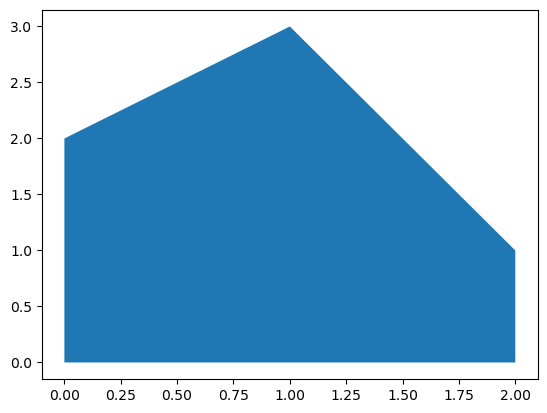

In [18]:
xcoord = [0,0,1,2,2]
ycoord = [0,2,3,1,0]
plt.fill(xcoord,ycoord)
plt.show()

## Simplex Method 

Let $A$ be an $m \times n$ matrix, $\mathbf{b} \in \mathbb{R}^m$ and $\mathbf{c} \in \mathbb{R}^n$. Consider the linear optimization problem: maximize $\mathbf{c}^T \mathbf{x}$ subject to $A \mathbf{x} \leq \mathbf{b}$, $\mathbf{x} \geq 0$.

Introduce slack variables $w_0,\dots,w_{m-1}$ for each constraint. The **simplex algorithm** is:

* Phase I: Find any vertex
    * If $\mathbf{b} \geq 0$ then choose $\mathbf{x} = 0$.
    * Otherwise, solve initialization problem.
* Phase II: Move from vertex to vertex to increase the value of objective function
    * Identify entering and leaving variables.
    * Perform pivot operation.
    * Repeat!

## Pivot Operation

Assume for now that $\mathbf{b} \geq 0$. Construct the initial **tableau** matrix:

$$
T = 
\begin{bmatrix}
A & I & \mathbf{b} \\
\mathbf{c}^T & 0 & 0
\end{bmatrix}
$$

My definition is different from other sources. I put $\mathbf{c}^T$ in the bottom row because I want the row indices of $T$ to match the indices of the slack variables. Like row 0 of $T$ corresponds to $w_0$, row 1 corresponds to $w_1$, etc.

The **basic variables** correspond to the columns of $T$ which are columns of the identity matrix (in the first $m$ rows). In the initial tableau, the slack variables $w_0,\dots,w_{m-1}$ are the basic variables and the decision variables $x_0,\dots,x_{n-1}$ are the nonbasic variables. The corresponding vertex is $\mathbf{x}=0$.

We want to move to an adjacent vertex by selecting a new basic variable (the **entering variable**) and removing an existing basic variable (the **leaving variable**).

We choose the entering and leaving variables such that:

* The value of the objective function increases.
* The new list of basic variables defines a vertex. In other words, the values of the basic variables (with nonbasic variables set to 0) are all *positive*.

How do we do this? Choose the entering variable such that it has a positive coefficient in the objective function. That is, choose a column with a positive value in the last row. Increasing the value of this variable will increase the value of the objective function.

Choose the leaving variable such that the values of the basic variables (with nonbasic variables set to 0) are all positive. To do this, let $k$ be the column index of the entering variable. Look at the ratios

$$
\frac{t_{i,n+m}}{t_{i,k}} \ , \ i = 0,\dots,m-1
$$

where $t_{i,n+m}$ are the entries in the last column of $T$, and $t_{i,k}$ are the entries in the $k$th column of $T$. Select row $i$ such that this ratio is postive and minimal. (Exercise: **Why?!**)

Let $k$ be the column index of the entering variable. Let $\ell$ be the row index of the leaving variable. The pivot operation applies row operations to the tableau $T$ such that column $k$ has 1 in row $\ell$ and all other entries 0. The last column of the tableau should always have positive entries in rows $0,\dots,m-1$.

Write a function called `tableau` which creates the matrix

$$
T = 
\begin{bmatrix}
A & I & \mathbf{b} \\
\mathbf{c}^T & 0 & 0
\end{bmatrix}
$$

In [27]:
def tableau(A,b,c):
    m,n = A.shape
    I = np.eye(m)
    T = np.vstack([ np.hstack([A,I,b.reshape((m,1))]) , np.hstack([c.flatten(),np.zeros(m+1)]) ])
    return T

Write a function called `pivot` which takes a tableau matrix $T$ and indices `k` and `l`. The function performs the pivot operation on $T$ and returns the new tableau matrix.

In [28]:
def pivot(T,k,l):
    E = np.eye(T.shape[0])
    E[:,l] = -T[:,k]/T[l,k]
    E[l,l] = 1/T[l,k]
    return E@T

**Example.** (Vanderbei: Exercise 2.1)

$$
A = \begin{bmatrix} 2 & 1 & 1 & 3 \\ 1 & 3 & 1 & 2 \end{bmatrix}
\hspace{1in}
\mathbf{b} = \begin{bmatrix} 5 \\ 3 \end{bmatrix}
\hspace{1in}
\mathbf{c} = \begin{bmatrix} 6 \\ 8 \\ 5 \\ 9 \end{bmatrix}
$$

In [30]:
A = np.array([[2.,1.,1.,3.],[1.,3.,1.,2.]])
c = np.array([6.,8.,5.,9.])
b = np.array([5.,3.])
T = tableau(A,b,c)
print(T)

[[2. 1. 1. 3. 1. 0. 5.]
 [1. 3. 1. 2. 0. 1. 3.]
 [6. 8. 5. 9. 0. 0. 0.]]


We see that column $k=3$ has the largest positive entry in the last row. Look at the ratios $\frac{t_{0,6}}{t_{0,3}}=5/3$ and $\frac{t_{1,6}}{t_{1,3}}=3/2$. Since the ratio for $i=1$ is positive and minimal we choose $\ell=1$.

In [31]:
T1 = pivot(T,3,1)
print(T1)

[[  0.5  -3.5  -0.5   0.    1.   -1.5   0.5]
 [  0.5   1.5   0.5   1.    0.    0.5   1.5]
 [  1.5  -5.5   0.5   0.    0.   -4.5 -13.5]]


Repeat!

In [32]:
T2 = pivot(T1,0,0)
print(T2)

[[  1.  -7.  -1.   0.   2.  -3.   1.]
 [  0.   5.   1.   1.  -1.   2.   1.]
 [  0.   5.   2.   0.  -3.   0. -15.]]


In [35]:
T3 = pivot(T2,1,1)
print(T3.round(3))

[[  1.   -0.    0.4   1.4   0.6  -0.2   2.4]
 [  0.    1.    0.2   0.2  -0.2   0.4   0.2]
 [  0.    0.    1.   -1.   -2.   -2.  -16. ]]


In [36]:
T4 = pivot(T3,2,1)
print(T4.round(3))

[[  1.  -2.  -0.   1.   1.  -1.   2.]
 [  0.   5.   1.   1.  -1.   2.   1.]
 [  0.  -5.   0.  -2.  -1.  -4. -17.]]


All the entries in the bottom row are negative therefore we have arrived! The optimal value is $17$ and occurs at $\mathbf{x} = (2,0,1,0)$.

**Question.** Why does the optimal value appear in the last row and column of the tableau?

**Example.** (Vanderbei: Exercise 2.9) Solve the following problem:

$$
A = \left[ \begin{array}{rrr} 0 & 2 & 3 \\ 1 & 1 & 2 \\ 1 & 2 & 3 \\  \end{array} \right]
\hspace{1in}
\mathbf{b} = \left[ \begin{array}{r} 5 \\ 4 \\ 7 \end{array} \right]
\hspace{1in}
\mathbf{c} = \left[ \begin{array}{r} 2 \\ 3 \\ 4 \end{array} \right]
$$

In [38]:
A = np.array([[0,2,3],[1,1,2],[1,2,3]])
b = np.array([5,4,7])
c = np.array([2,3,4])
T = tableau(A,b,c)

In [39]:
T

array([[0., 2., 3., 1., 0., 0., 5.],
       [1., 1., 2., 0., 1., 0., 4.],
       [1., 2., 3., 0., 0., 1., 7.],
       [2., 3., 4., 0., 0., 0., 0.]])

In [40]:
T1 = pivot(T,2,0)
T1.round(2)

array([[ 0.  ,  0.67,  1.  ,  0.33,  0.  ,  0.  ,  1.67],
       [ 1.  , -0.33,  0.  , -0.67,  1.  ,  0.  ,  0.67],
       [ 1.  ,  0.  ,  0.  , -1.  ,  0.  ,  1.  ,  2.  ],
       [ 2.  ,  0.33,  0.  , -1.33,  0.  ,  0.  , -6.67]])

In [41]:
T2 = pivot(T1,0,1)
T2.round(2)

array([[ 0.  ,  0.67,  1.  ,  0.33,  0.  ,  0.  ,  1.67],
       [ 1.  , -0.33,  0.  , -0.67,  1.  ,  0.  ,  0.67],
       [ 0.  ,  0.33,  0.  , -0.33, -1.  ,  1.  ,  1.33],
       [ 0.  ,  1.  ,  0.  ,  0.  , -2.  ,  0.  , -8.  ]])

In [42]:
T3 = pivot(T2,1,0)
T3.round(2)

array([[  0. ,   1. ,   1.5,   0.5,   0. ,   0. ,   2.5],
       [  1. ,   0. ,   0.5,  -0.5,   1. ,   0. ,   1.5],
       [  0. ,   0. ,  -0.5,  -0.5,  -1. ,   1. ,   0.5],
       [  0. ,   0. ,  -1.5,  -0.5,  -2. ,   0. , -10.5]])

Optimial value $10.5$ occurs at $\mathbf{x} = (1.5,2.5,0.0)$.

## SciPy Solver

[SciPy](https://scipy.org) is a library of Python packages for scientific computing. The subackage `scipy.optimize` includes the function `linprog` to compute solutions of linear optimization problems. See the [SciPy tutorial on optimization](https://docs.scipy.org/doc/scipy/tutorial/optimize.html).

In [44]:
from scipy.optimize import linprog

Note that the function `linprog` assumes the objective function is to be **minimized** therefore we should enter our objective functions as $-\mathbf{c}$.

**Exercise.** Compute the solutions of the examples above.

In [45]:
A = np.array([[0,2,3],[1,1,2],[1,2,3]])
b = np.array([5,4,7])
c = np.array([2,3,4])

In [51]:
result = linprog(-c,A,b)

In [52]:
type(result)

scipy.optimize._optimize.OptimizeResult

In [53]:
result.x

array([0. , 0.5, 1.5])

In [54]:
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 3.0
              x: [ 0.000e+00  5.000e-01  1.500e+00]
            nit: 3
          lower:  residual: [ 0.000e+00  5.000e-01  1.500e+00]
                 marginals: [ 1.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-3.000e+00 -3.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [55]:
A = np.array([[-1,-1,-1],[2,-1,1]])
b = np.array([-2,1])
c = np.array([2,-6,0])
result = linprog(-c,A,b)
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 3.0
              x: [ 0.000e+00  5.000e-01  1.500e+00]
            nit: 3
          lower:  residual: [ 0.000e+00  5.000e-01  1.500e+00]
                 marginals: [ 1.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-3.000e+00 -3.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

**Exercise.** Compute solutions to random examples.

In [ ]:
m,n = 50,200
A = np.random.randint(0,2,(m,n))
b = np.random.randint(1,50,(m,1))
c = np.random.rand(n)

result = linprog(-c,A,b)

print(results.x)